# Maximum Likelihood vs Maximum A-posteriori

In this notebook, we compare estimating the weights ${\bf w}$ of a linear regression via ML and MAP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.linalg import inv

%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
np.set_printoptions(precision=5, suppress=True)

### Creating the synthetic data

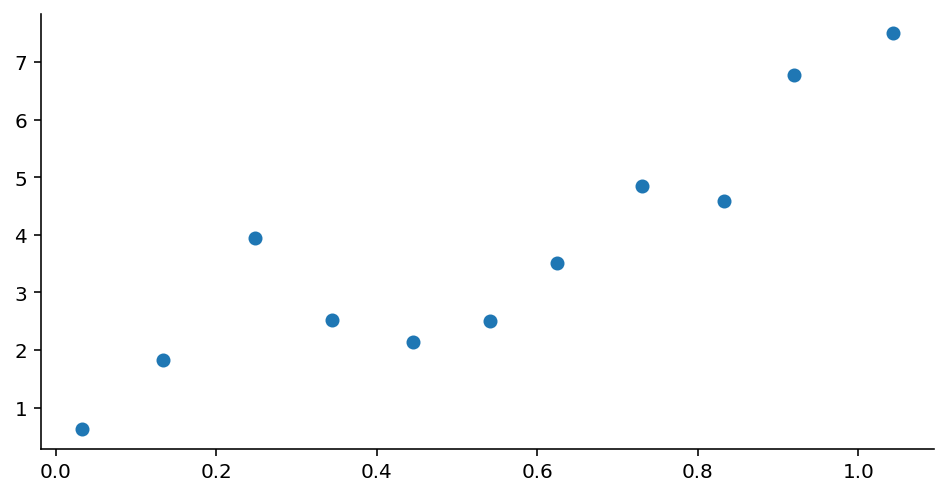

In [2]:
seed(31415)
N, M = 11, 11
α = 1.3
x = np.linspace(0, 1, N) + np.random.rand(N) * 0.05
t = 3 * x + 2.3 * x ** 2 + 1.2 + np.random.randn(N) / α
Phi = np.stack([x ** m for m in range(M)], axis=-1)

plt.scatter(x, t)

### ML vs MAP for $N=M$

In [3]:
w_map = inv(α * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_map

array([[1.69066],
       [1.3315 ],
       [0.94343],
       [0.73423],
       [0.58872],
       [0.47213],
       [0.37393],
       [0.28953],
       [0.21596],
       [0.15095],
       [0.09268]])

In [4]:
w_ml = inv(Phi.T @ Phi) @ Phi.T @ t[:, None]
w_ml

array([[      16.07303],
       [    -748.87085],
       [   11337.69034],
       [  -79608.42287],
       [  313855.55583],
       [ -754568.3565 ],
       [ 1135820.7735 ],
       [-1053174.27092],
       [  561534.8151 ],
       [ -143877.14885],
       [    9425.03585]])

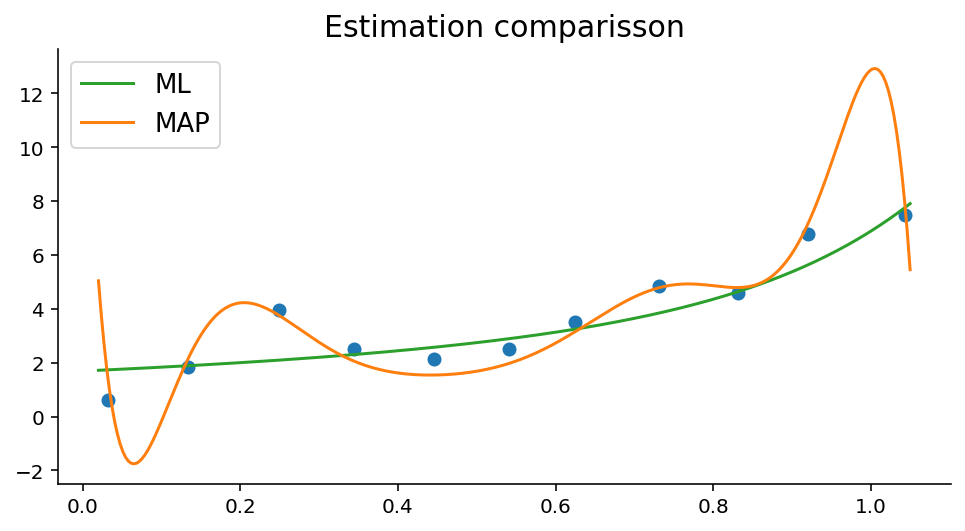

In [5]:
N_test = 300
x_test = np.linspace(0.02, 1.05, N_test)
Phi_test = np.stack([x_test ** m for m in range(M)], axis=-1)

t_map = np.ravel(Phi_test @ w_map)
t_ml = np.ravel(Phi_test @ w_ml)
plt.plot(x_test, t_map, label="ML", c="tab:green")
plt.plot(x_test, t_ml, label="MAP", c="tab:orange")
plt.scatter(x, t, c="tab:blue")
plt.title("Estimation comparisson", fontsize=15)
plt.legend(fontsize=13);

### ${\bf w}_\text{MAP}$ for different $\alpha$ values

The larger $\alpha$ is with respect to the true $\alpha$, the more we overfit the data; the smaller $\alpha$ with respect to the true $\alpha$, the more the estimation tends to zero (resp. it implies that our prior beliefs about the true weigths of the model are that they are close to zero with much certainty)

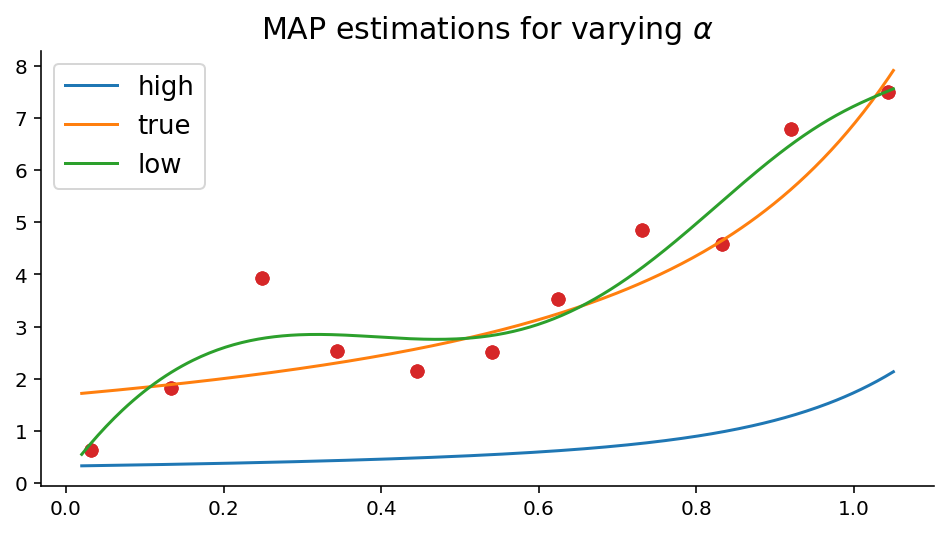

In [6]:
α_low = 0.0001
α_high = 100.5

w_map = inv(α * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_map_high = inv(α_high * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_map_low = inv(α_low * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_list = [w_map_high, w_map, w_map_low]
labels = ["high", "true", "low"]
for w, label in zip(w_list, labels):
    t_map = np.ravel(Phi_test @ w)
    plt.plot(x_test, t_map, label=label)
    plt.scatter(x, t, c="tab:red")
plt.legend(fontsize=13)
plt.title(r"MAP estimations for varying $\alpha$", fontsize=15);

### How many datapoints to make ${\bf w}_{ML}$ well defined?

In [7]:
seed(31415)
N, M = 11, 11
α = 1.3
x = np.linspace(0, 1, N) + np.random.rand(N) * 0.05
t = 3 * x + 1.2 + np.random.randn(N) / α
Phi = np.stack([x ** m for m in range(M)], axis=-1)

In [8]:
np.linalg.det(Phi.T @ Phi)

2.2274075348029745e-55

In [9]:
np.linalg.matrix_rank(Phi.T @ Phi)

10

In [10]:
np.linalg.eigvals(Phi.T @ Phi)

array([29.05262,  6.91538,  0.80405,  0.06404,  0.00329,  0.00012,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ])

In [11]:
w_ml = inv(Phi.T @ Phi) @ Phi.T @ t[:, None]
w_ml

array([[      15.82421],
       [    -748.33972],
       [   11341.91667],
       [  -79628.01709],
       [  313876.25215],
       [ -754581.09779],
       [ 1135828.10449],
       [-1053178.02315],
       [  561536.39252],
       [ -143877.66896],
       [    9425.1283 ]])